# NLP Homework 1
## Lexical Diversity of Graded Readers
### George C. Sturrock
### January 13, 2019

#### Objectives
1. Implement Lexical Diversity Scoring
2. Compare the vocabulary size of the three graded readers
3. Write a paragraph arguing whether vocabulary size and lexical diversity in combination could be a better measure of text difficulty (or reading level) than either measure is by itself.

In [91]:
import nltk
from nltk.corpus import stopwords
set(stopwords.words('english'))

import numpy as np
import matplotlib.pyplot as plt

In [2]:
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [

       |   Unzipping corpora/conll2002.zip.
       | Downloading package dependency_treebank to
       |     /home/george_sturrock/nltk_data...
       |   Unzipping corpora/dependency_treebank.zip.
       | Downloading package genesis to
       |     /home/george_sturrock/nltk_data...
       |   Unzipping corpora/genesis.zip.
       | Downloading package gutenberg to
       |     /home/george_sturrock/nltk_data...
       |   Unzipping corpora/gutenberg.zip.
       | Downloading package ieer to
       |     /home/george_sturrock/nltk_data...
       |   Unzipping corpora/ieer.zip.
       | Downloading package inaugural to
       |     /home/george_sturrock/nltk_data...
       |   Unzipping corpora/inaugural.zip.
       | Downloading package movie_reviews to
       |     /home/george_sturrock/nltk_data...
       |   Unzipping corpora/movie_reviews.zip.
       | Downloading package nps_chat to
       |     /home/george_sturrock/nltk_data...
       |   Unzipping corpora/nps_chat.zip.
      

True

In [3]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [4]:
text1

<Text: Moby Dick by Herman Melville 1851>

In [5]:
text2

<Text: Sense and Sensibility by Jane Austen 1811>

A concordance view shows us every occurrence of a given word, together with some context.  This is not case sensitive.

In [8]:
text1.concordance("monstrous")

Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u


Words the appear in a similar range of contexts.  ".similar" isn't a thesaurus function?  It is a list of similar words used in a range of context.  Melville uses monstrous in a negative sense.  Austen (text2) uses it in a positive sense.  

In [9]:
text1.similar("monstrous")

part subtly untoward modifies horrible exasperate lazy true reliable
lamentable singular imperial maddens abundant curious mean pitiable
wise vexatious domineering


In [10]:
text2.similar("monstrous")

very so exceedingly heartily extremely amazingly sweet remarkably
great a vast as good


The term common_contexts allows us to examine just the contexts that are shared by two or more words, such as monstrous and very. We have to enclose these words by square brackets as well as parentheses, and separate them with a comma:

In [11]:
text2.common_contexts(["monstrous", "very"])

is_pretty be_glad a_lucky a_pretty am_glad


In [20]:
text1.common_contexts(["ahab", "whale"])

of_s on_s are_and


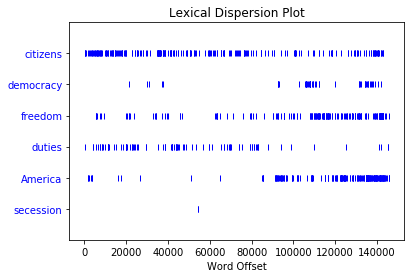

In [32]:
text4.dispersion_plot(["citizens", "democracy", "freedom", "duties", "America", "secession"])

Now, just for fun, let's try generating some random text in the various styles we have just seen. To do this, we type the name of the text followed by the term generate. (We need to include the parentheses, but there's nothing that goes between them.)

In [35]:
text3.generate('words')

##### Counting Vocabulary

In [42]:
#Number of tokens (words and punctuation symbols)
len(text3)

44764

In [43]:
#distinct tokens in text3
sorted(set(text3))

['!',
 "'",
 '(',
 ')',
 ',',
 ',)',
 '.',
 '.)',
 ':',
 ';',
 ';)',
 '?',
 '?)',
 'A',
 'Abel',
 'Abelmizraim',
 'Abidah',
 'Abide',
 'Abimael',
 'Abimelech',
 'Abr',
 'Abrah',
 'Abraham',
 'Abram',
 'Accad',
 'Achbor',
 'Adah',
 'Adam',
 'Adbeel',
 'Admah',
 'Adullamite',
 'After',
 'Aholibamah',
 'Ahuzzath',
 'Ajah',
 'Akan',
 'All',
 'Allonbachuth',
 'Almighty',
 'Almodad',
 'Also',
 'Alvah',
 'Alvan',
 'Am',
 'Amal',
 'Amalek',
 'Amalekites',
 'Ammon',
 'Amorite',
 'Amorites',
 'Amraphel',
 'An',
 'Anah',
 'Anamim',
 'And',
 'Aner',
 'Angel',
 'Appoint',
 'Aram',
 'Aran',
 'Ararat',
 'Arbah',
 'Ard',
 'Are',
 'Areli',
 'Arioch',
 'Arise',
 'Arkite',
 'Arodi',
 'Arphaxad',
 'Art',
 'Arvadite',
 'As',
 'Asenath',
 'Ashbel',
 'Asher',
 'Ashkenaz',
 'Ashteroth',
 'Ask',
 'Asshur',
 'Asshurim',
 'Assyr',
 'Assyria',
 'At',
 'Atad',
 'Avith',
 'Baalhanan',
 'Babel',
 'Bashemath',
 'Be',
 'Because',
 'Becher',
 'Bedad',
 'Beeri',
 'Beerlahairoi',
 'Beersheba',
 'Behold',
 'Bela',
 'Belah

In [44]:
#The number of distinct tokens in text 3
len(set(text3))

2789

In [47]:
#lexical richness.  Number of distinct tokens / total number of tokens
round(len(set(text3)) / len(text3), 4)

0.0623

In [48]:
#how many times does "smote" occurr in text3?
text3.count("smote")

5

In [50]:
#Percentage of tokens = 'a'
round(100 * text4.count('a') / len(text4), 4)

1.4643

In [55]:
#How many times does "lol" appear in text 5?  What percentage of text5 tokens is "lol"?
print("'lol' appears", text5.count("lol"), "times in text5")
print("'lol' constitutes", round(100 * text5.count('lol') / len(text5), 4),"% of tokens in text5")

'lol' appears 704 times in text5
'lol' constitutes 1.5641 % of tokens in text5


In [69]:
#Functions for lexical diversity
def lexical_diversity(text):
    return round(len(set(text)) / len(text), 4)

def percentage(count, total):
    return round(100 * count / total, 4)

def percentage2(token, text):
    return round((100 *text.count(token)) / len(text), 4)

In [61]:
lexical_diversity(text3)

0.0623

In [62]:
percentage(4, 5)

80.0

In [63]:
percentage(text4.count('a'), len(text4))

1.4643

##### Lists

In [66]:
sent2

['The',
 'family',
 'of',
 'Dashwood',
 'had',
 'long',
 'been',
 'settled',
 'in',
 'Sussex',
 '.']

In [70]:
lexical_diversity(sent2)
percentage2("of", sent2)

9.0909

In [71]:
#Use '+' to add/append lists together
sent4 + sent1

['Fellow',
 '-',
 'Citizens',
 'of',
 'the',
 'Senate',
 'and',
 'of',
 'the',
 'House',
 'of',
 'Representatives',
 ':',
 'Call',
 'me',
 'Ishmael',
 '.']

In [73]:
#append single token to list
sent1.append("Some")
sent1

['Call', 'me', 'Ishmael', '.', 'Some', 'Some']

In [74]:
#indexing in lists
text4[173]

'awaken'

In [75]:
#first occurence of awaken in text
text4.index('awaken')

173

In [77]:
#slicing lists
##Use slicing to taken out forward, preface, publisher notes, indexes...
text5[16715:16735]

['U86',
 'thats',
 'why',
 'something',
 'like',
 'gamefly',
 'is',
 'so',
 'good',
 'because',
 'you',
 'can',
 'actually',
 'play',
 'a',
 'full',
 'game',
 'without',
 'buying',
 'it']

##### Vocabulary Size

In [78]:
vocab = set(text1)
vocab_size = len(vocab)
vocab_size

19317

In [80]:
tokens = sorted(set(text3))
tokens[-2:]

['yourselves', 'youth']

##### Frequency Distributions

In [85]:
fdist1 = FreqDist(text1)
print(fdist1)

<FreqDist with 19317 samples and 260819 outcomes>


In [86]:
fdist1.most_common(50)

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982),
 ("'", 2684),
 ('-', 2552),
 ('his', 2459),
 ('it', 2209),
 ('I', 2124),
 ('s', 1739),
 ('is', 1695),
 ('he', 1661),
 ('with', 1659),
 ('was', 1632),
 ('as', 1620),
 ('"', 1478),
 ('all', 1462),
 ('for', 1414),
 ('this', 1280),
 ('!', 1269),
 ('at', 1231),
 ('by', 1137),
 ('but', 1113),
 ('not', 1103),
 ('--', 1070),
 ('him', 1058),
 ('from', 1052),
 ('be', 1030),
 ('on', 1005),
 ('so', 918),
 ('whale', 906),
 ('one', 889),
 ('you', 841),
 ('had', 767),
 ('have', 760),
 ('there', 715),
 ('But', 705),
 ('or', 697),
 ('were', 680),
 ('now', 646),
 ('which', 640),
 ('?', 637),
 ('me', 627),
 ('like', 624)]

In [87]:
fdist1['whale']

906

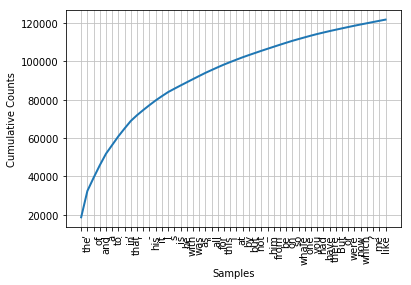

In [89]:
fdist1.plot(50, cumulative=True)

In [92]:
V = set(text1)
long_words = [w for w in V if len(w) > 15]
sorted(long_words)

['CIRCUMNAVIGATION',
 'Physiognomically',
 'apprehensiveness',
 'cannibalistically',
 'characteristically',
 'circumnavigating',
 'circumnavigation',
 'circumnavigations',
 'comprehensiveness',
 'hermaphroditical',
 'indiscriminately',
 'indispensableness',
 'irresistibleness',
 'physiognomically',
 'preternaturalness',
 'responsibilities',
 'simultaneousness',
 'subterraneousness',
 'supernaturalness',
 'superstitiousness',
 'uncomfortableness',
 'uncompromisedness',
 'undiscriminating',
 'uninterpenetratingly']

##### Collocations and Bigrams
A collocation is a sequence of words that occur together unusually often. 

A bigram is a word pair.  

In [94]:
text4.collocations()

United States; fellow citizens; four years; years ago; Federal
Government; General Government; American people; Vice President; Old
World; Almighty God; Fellow citizens; Chief Magistrate; Chief Justice;
God bless; every citizen; Indian tribes; public debt; one another;
foreign nations; political parties


In [99]:
list(bigrams(text4))

[('Fellow', '-'),
 ('-', 'Citizens'),
 ('Citizens', 'of'),
 ('of', 'the'),
 ('the', 'Senate'),
 ('Senate', 'and'),
 ('and', 'of'),
 ('of', 'the'),
 ('the', 'House'),
 ('House', 'of'),
 ('of', 'Representatives'),
 ('Representatives', ':'),
 (':', 'Among'),
 ('Among', 'the'),
 ('the', 'vicissitudes'),
 ('vicissitudes', 'incident'),
 ('incident', 'to'),
 ('to', 'life'),
 ('life', 'no'),
 ('no', 'event'),
 ('event', 'could'),
 ('could', 'have'),
 ('have', 'filled'),
 ('filled', 'me'),
 ('me', 'with'),
 ('with', 'greater'),
 ('greater', 'anxieties'),
 ('anxieties', 'than'),
 ('than', 'that'),
 ('that', 'of'),
 ('of', 'which'),
 ('which', 'the'),
 ('the', 'notification'),
 ('notification', 'was'),
 ('was', 'transmitted'),
 ('transmitted', 'by'),
 ('by', 'your'),
 ('your', 'order'),
 ('order', ','),
 (',', 'and'),
 ('and', 'received'),
 ('received', 'on'),
 ('on', 'the'),
 ('the', '14th'),
 ('14th', 'day'),
 ('day', 'of'),
 ('of', 'the'),
 ('the', 'present'),
 ('present', 'month'),
 ('month',

Counting in text

In [109]:
#most common tokens.  
## consider forcing upper or lower to avoid "whale" and "Whale" being counted seperately
fdist1.most_common()

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982),
 ("'", 2684),
 ('-', 2552),
 ('his', 2459),
 ('it', 2209),
 ('I', 2124),
 ('s', 1739),
 ('is', 1695),
 ('he', 1661),
 ('with', 1659),
 ('was', 1632),
 ('as', 1620),
 ('"', 1478),
 ('all', 1462),
 ('for', 1414),
 ('this', 1280),
 ('!', 1269),
 ('at', 1231),
 ('by', 1137),
 ('but', 1113),
 ('not', 1103),
 ('--', 1070),
 ('him', 1058),
 ('from', 1052),
 ('be', 1030),
 ('on', 1005),
 ('so', 918),
 ('whale', 906),
 ('one', 889),
 ('you', 841),
 ('had', 767),
 ('have', 760),
 ('there', 715),
 ('But', 705),
 ('or', 697),
 ('were', 680),
 ('now', 646),
 ('which', 640),
 ('?', 637),
 ('me', 627),
 ('like', 624),
 ('their', 612),
 ('The', 612),
 ('are', 586),
 ('they', 586),
 ('an', 582),
 ('some', 578),
 ('then', 571),
 ('my', 564),
 ('when', 553),
 ('upon', 538),
 ('out', 529),
 ('into', 520),
 ('man', 508),
 ('ship', 507),
 ('up', 505),
 ('mor

In [105]:
#frequence by word length
fdist = FreqDist(len(w) for w in text1)
print(fdist)
fdist

<FreqDist with 19 samples and 260819 outcomes>


FreqDist({3: 50223, 1: 47933, 4: 42345, 2: 38513, 5: 26597, 6: 17111, 7: 14399, 8: 9966, 9: 6428, 10: 3528, ...})

In [106]:
fdist.most_common()

[(3, 50223),
 (1, 47933),
 (4, 42345),
 (2, 38513),
 (5, 26597),
 (6, 17111),
 (7, 14399),
 (8, 9966),
 (9, 6428),
 (10, 3528),
 (11, 1873),
 (12, 1053),
 (13, 567),
 (14, 177),
 (15, 70),
 (16, 22),
 (17, 12),
 (18, 1),
 (20, 1)]

In [107]:
fdist.max()

3

In [108]:
fdist.freq(3)

0.19255882431878046

##### Other Notes
**Turing Test**: can a dialogue system, responding to a user's text input, perform so naturally that we cannot distinguish it from a human-generated response?

